# Physionet CTG Extract UC

see: https://physionet.org/physiobank/database/ctu-uhb-ctgdb/


In [1]:
import config_local
from config_common import *

In [2]:
import wfdb
import os
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import scipy.interpolate

In [3]:
from ctg_utils import get_all_recno, parse_meta_comments, physionet_ctg_generate_mask

In [4]:
from uc_extract import *

# Code

In [5]:
def show_uc_plots(idx_peaks, sig, ts):
    idx_min = find_uc_gaps(idx_peaks, sig)
 
    plt.figure(figsize=(12, 3))
    plt.title('Signal')
    plt.plot(ts/60, sig)
    plt.scatter([ts[i]/60 for i in idx_peaks], [sig[i] for i in idx_peaks], c='r')
    plt.scatter([ts[i]/60 for i in idx_min], [sig[i] for i in idx_min])
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.title('Signal Zoom 0 -30')
    plt.plot(ts/60, sig)
    plt.scatter([ts[i]/60 for i in idx_peaks], [sig[i] for i in idx_peaks], c='r')
    plt.scatter([ts[i]/60 for i in idx_min], [sig[i] for i in idx_min])
    plt.xlim(0, 30)
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.title('Signal Zoom 20 - 50')
    plt.plot(ts/60, sig)
    plt.scatter([ts[i]/60 for i in idx_peaks], [sig[i] for i in idx_peaks], c='r')
    plt.scatter([ts[i]/60 for i in idx_min], [sig[i] for i in idx_min])
    plt.xlim(20, 50)
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.title('Signal Zoom 40-70')
    plt.plot(ts/60, sig)
    plt.scatter([ts[i]/60 for i in idx_peaks], [sig[i] for i in idx_peaks], c='r')
    plt.scatter([ts[i]/60 for i in idx_min], [sig[i] for i in idx_min])
    plt.xlim(40, 70)
    plt.show()

## Process Recordings


Record: 1001
nSamples: 19200


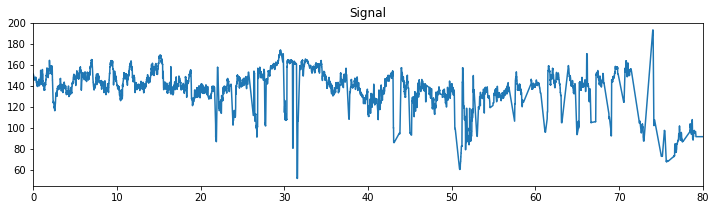

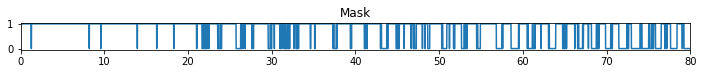

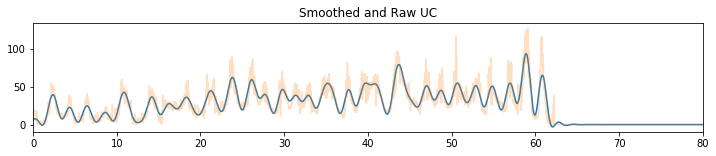

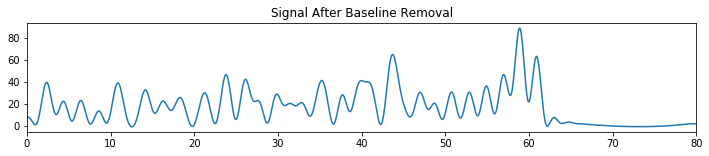

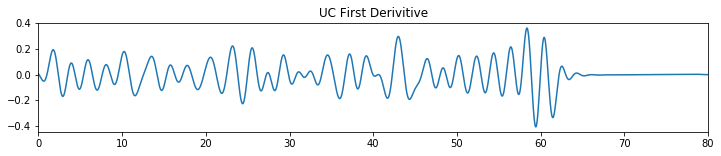

In [6]:
show_meta = True
recno = '1001'

recno_full = os.path.join(local_recordings_dir_full, recno)
print('\nRecord: {}'.format(recno))
all_sig, meta = wfdb.io.rdsamp(recno_full)
print('nSamples: {}'.format(all_sig.shape[0]))

sig_hr = all_sig[:, 0]
sig_uc = all_sig[:, 1]
ts = np.arange(all_sig.shape[0])/meta['fs']
tm = ts/60
meta['comments'] = parse_meta_comments(meta['comments'])

mask, sig_hr = physionet_ctg_generate_mask(sig_hr)

plt.figure(figsize=(12, 3))
plt.title('Signal')
plt.plot(tm, sig_hr)
plt.xlim(tm[0], tm[-1])
plt.show()

plt.figure(figsize=(12, 0.5))
plt.title('Mask')
plt.plot(tm, mask)
plt.xlim(tm[0], tm[-1])
plt.show()

sig_filt_uc = filtUC(sig_uc, 1.0/100, fs=meta['fs'], order=5)

plt.figure(figsize=(12, 2))
plt.title('Smoothed and Raw UC')
plt.plot(tm, sig_filt_uc)
plt.plot(tm, sig_uc, alpha=0.25)
plt.xlim(tm[0], tm[-1])
plt.show()

sig_norm_uc = uc_remove_baseline(sig_filt_uc, show_plot=False) 
sig_norm_uc = filtUC(sig_norm_uc, 1.0/100, fs=meta['fs'], order=5)

plt.figure(figsize=(12, 2))
plt.title('Signal After Baseline Removal')
plt.plot(tm, sig_norm_uc)
plt.xlim(tm[0], tm[-1])
plt.show()

plt.figure(figsize=(12, 2))
plt.title('UC First Derivitive')
plt.plot(tm[1:], np.diff(sig_norm_uc))
plt.xlim(tm[0], tm[-1])
plt.show()

Remove Peaks - Singleton using Mag Change
    Peak:    @  31.4 min   Mag:  20.6
    Peak:    @  63.0 min   Mag:   7.8
    Peak:    @  64.7 min   Mag:   3.7
Remove Peaks - Adjacent using Mag
    Peak:    @  32.8 min   Mag:  21.3
    Peak:    @  48.7 min   Mag:  20.7


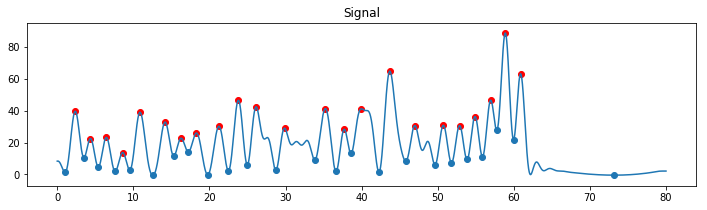

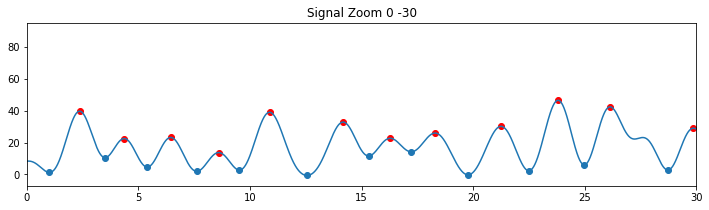

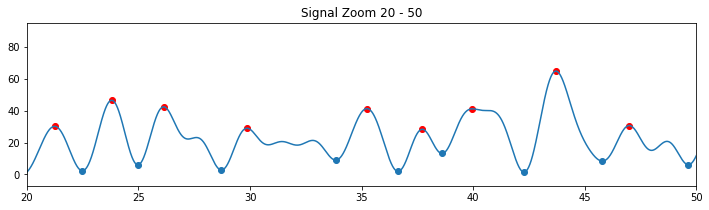

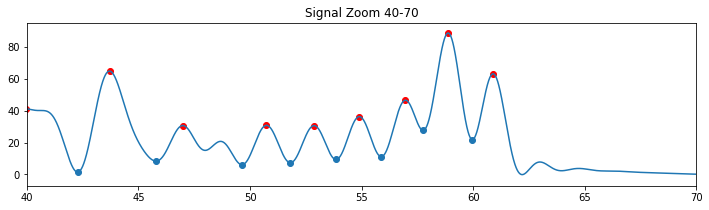

In [7]:
idx_peaks = find_uc_peaks(sig_norm_uc, ts)
show_uc_plots(idx_peaks, sig_norm_uc, ts)